# Importing required libraies 

In [299]:
from numpy import *
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Reading Data

In [300]:
# Importing training data 
train_data=read_csv(r"C:\Users\DELL\Documents\Digit classification\train.csv\train.csv")

In [301]:
#Importing testing data
test_data=read_csv(r"C:\Users\DELL\Documents\Digit classification\test.csv\test.csv")

In [302]:
#Checking the size of training data
train_data.shape

(42000, 785)

In [303]:
#Checking the size of testing data
test_data.shape

(28000, 784)

In [304]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [333]:
#Checking training data for null values
train_data.isnull().sum().sum()

0

In [334]:
#Checking testing data for null values
test_data.isnull().sum().sum()

0

In [335]:
#Checking training data for duplicated values
train_data.duplicated().sum()

0

In [336]:
#Checking testing data for duplicated values
test_data.duplicated().sum()

0

In [308]:
X=train_data.drop(columns="label")

In [309]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
y=train_data["label"]

In [311]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [381]:
y.nunique()

10

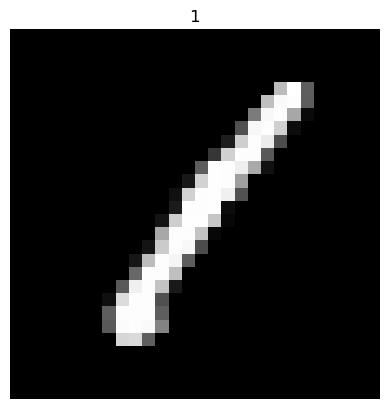

In [312]:
#Looking at training instance
img = X.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_data.iloc[0,0])
plt.axis("off")
plt.show()

In [313]:
#Splitting training data to training set and development sat
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1, random_state=44, shuffle =True)

In [314]:
#Size of training data
X_train.shape

(37800, 784)

In [315]:
#Size of testing data
X_dev.shape

(4200, 784)

# Building And Training Neural Network

In [316]:
#Building NN 
MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu
                                   solver='adam',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.1 ,hidden_layer_sizes=(120, 30),random_state=130)

In [317]:
#Training the NN
MLPClassifierModel.fit(X_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(120, 30), random_state=130)

In [319]:
#Score of training data
MLPClassifierModel.score(X_train,y_train)

0.9967460317460317

In [320]:
#Score of develoment data 
MLPClassifierModel.score(X_dev,y_dev)

0.9688095238095238

# Model Evaluation And Making Predictions

In [365]:
#Using model for perdiction
y_pred = MLPClassifierModel.predict(X_dev)

In [366]:
y_pred[:10]

array([9, 5, 2, 1, 4, 5, 2, 4, 3, 7], dtype=int64)

In [367]:
y_dev[:10]

2111     9
38947    7
33436    2
20504    1
11295    4
10682    5
31471    2
40130    4
31942    3
24548    7
Name: label, dtype: int64

In [368]:
#NN evaluation using Confusion Matrix
CM = confusion_matrix(y_dev, y_pred)

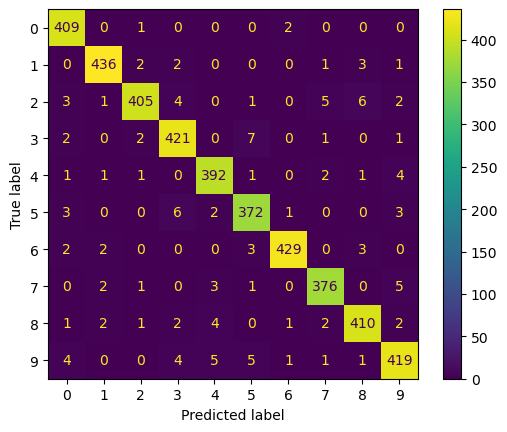

In [369]:
conf_matrix_disp = ConfusionMatrixDisplay(CM)
conf_matrix_disp.plot()

In [370]:
X_test=test_data

In [371]:
#Using the model to make perdiction on test data
y_pred1 = MLPClassifierModel.predict(X_test)

In [372]:
y_pred1

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [373]:
y_pred1.shape

(28000,)

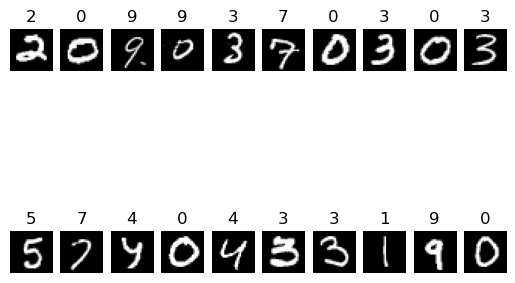

In [374]:
#Checking the model accuracy for test data
for i in range(20):
    plt.subplot(2,10,i+1)
    img = X_test.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(y_pred1[i])
    plt.axis("off")
plt.show()